In [33]:
import pandas as pd
#loading the csv file
# The CSV file is located in the data directory
df = pd.read_csv('../data/benin-malanville.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [34]:
# Shape of the dataset
print("Rows, Columns:", df.shape)

# Column names and data types
df.info()

# Summary statistics for numeric columns
df.describe()

# Count missing values per column
df.isnull().sum()


Rows, Columns: (525600, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  T

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [35]:
# Drop the empty column
df.drop(columns=['Comments'], inplace=True)

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as index (optional but useful for time series)
df.set_index('Timestamp', inplace=True)

# Confirm changes
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-null  float64


In [36]:
import pandas as pd

# Display summary statistics for numeric columns
summary_stats = df.describe()

# Display missing value count
missing_values = df.isna().sum()

# Flag columns with more than 5% missing data
threshold = 0.05 * len(df)
high_missing = missing_values[missing_values > threshold]

# Display
print("Summary Statistics:\n", summary_stats)
print("\nMissing Value Report:\n", missing_values)
print("\nColumns with >5% missing values:\n", high_missing if not high_missing.empty else "None")


Summary Statistics:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         

In [37]:
import os

# Make sure you replace 'df' below with your actual cleaned DataFrame variable name
df_cleaned = df  # <-- Change 'df' to your cleaned DataFrame variable if different

# Ensure the 'data' folder exists
os.makedirs("data", exist_ok=True)

# Set the file path
clean_data_path = "data/benin_clean.csv"

# Export to CSV without the index column
df_cleaned.to_csv(clean_data_path, index=False)

print(f"Cleaned data exported to {clean_data_path}")


Cleaned data exported to data/benin_clean.csv


In [38]:
from scipy.stats import zscore
import numpy as np

# 1. List of columns to check for outliers and negative values
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# 2. Replace negative values with NaN (optional: or just clip at 0)
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']:
    df[col] = df[col].apply(lambda x: x if x >= 0 else np.nan)

# 3. Compute Z-scores for selected columns
z_scores = df[cols_to_check].apply(zscore)

# 4. Flag values where |Z| > 3 as outliers and replace with NaN
outlier_mask = (z_scores.abs() > 3)
df[cols_to_check] = df[cols_to_check].mask(outlier_mask)

# 5. Impute missing values (from negative or outlier replacement) with median
for col in cols_to_check:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Final check: any remaining NaNs?
print(df[cols_to_check].isna().sum())


GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


C:\Users\aweso\AppData\Local\Temp\ipykernel_48176\3483063652.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\aweso\AppData\Local\Temp\ipykernel_48176\3483063652.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

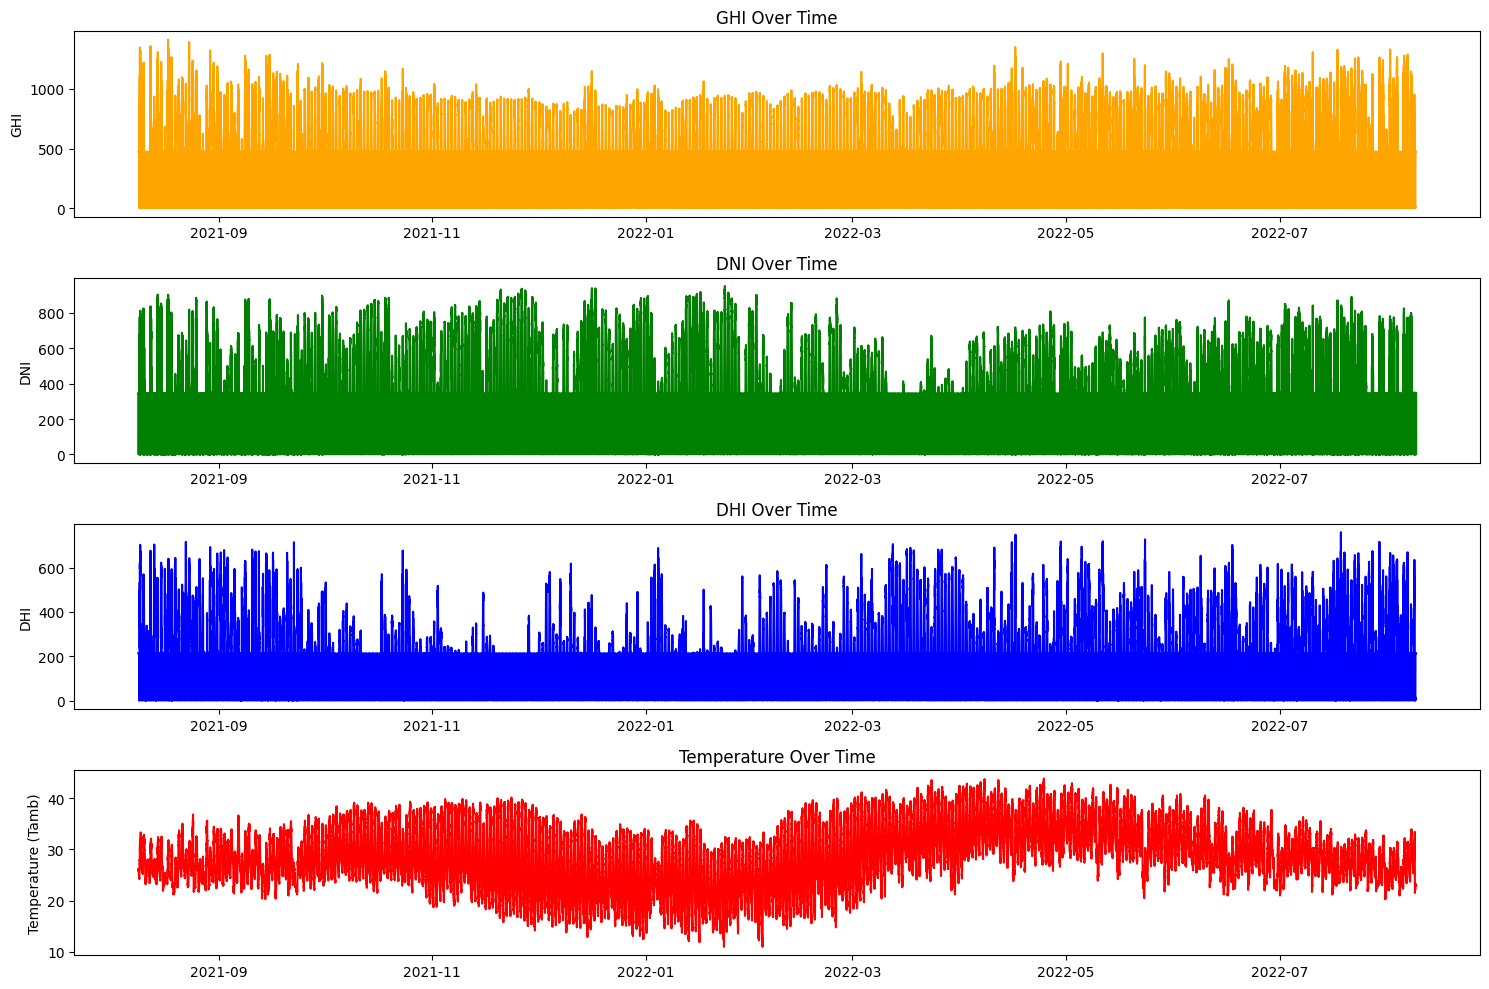

C:\Users\aweso\AppData\Local\Temp\ipykernel_48176\3189222649.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()


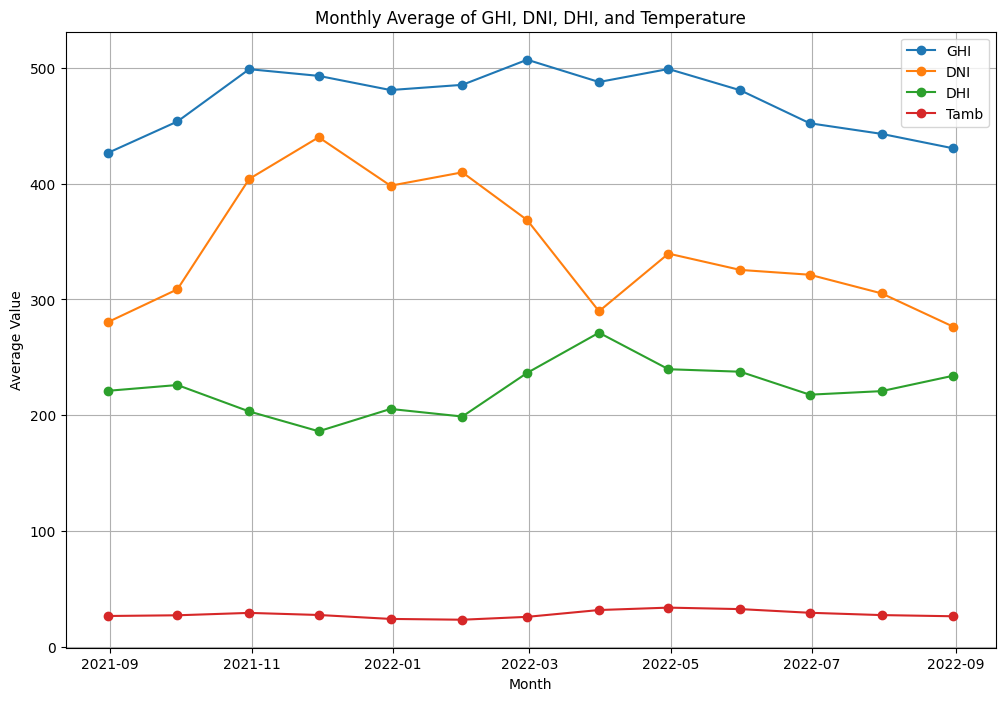

In [12]:
import matplotlib.pyplot as plt

#Line charts of GHI, DNI, DHI, Tamb over time
plt.figure(figsize=(15,10))
plt.subplot(4,1,1)
plt.plot(df.index, df['GHI'], label='GHI', color='orange')
plt.ylabel('GHI')
plt.title('GHI Over Time')

plt.subplot(4,1,2)
plt.plot(df.index, df['DNI'], label='DNI', color='green')
plt.ylabel('DNI')
plt.title('DNI Over Time')

plt.subplot(4,1,3)
plt.plot(df.index, df['DHI'], label='DHI', color='blue')
plt.ylabel('DHI')
plt.title('DHI Over Time')

plt.subplot(4,1,4)
plt.plot(df.index, df['Tamb'], label='Tamb', color='red')
plt.ylabel('Temperature (Tamb)')
plt.title('Temperature Over Time')

plt.tight_layout()
plt.show()

#Monthly average patterns
monthly_avg = df.resample('M').mean()

plt.figure(figsize=(12,8))
plt.plot(monthly_avg.index, monthly_avg['GHI'], label='GHI', marker='o')
plt.plot(monthly_avg.index, monthly_avg['DNI'], label='DNI', marker='o')
plt.plot(monthly_avg.index, monthly_avg['DHI'], label='DHI', marker='o')
plt.plot(monthly_avg.index, monthly_avg['Tamb'], label='Tamb', marker='o')

plt.title('Monthly Average of GHI, DNI, DHI, and Temperature')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()


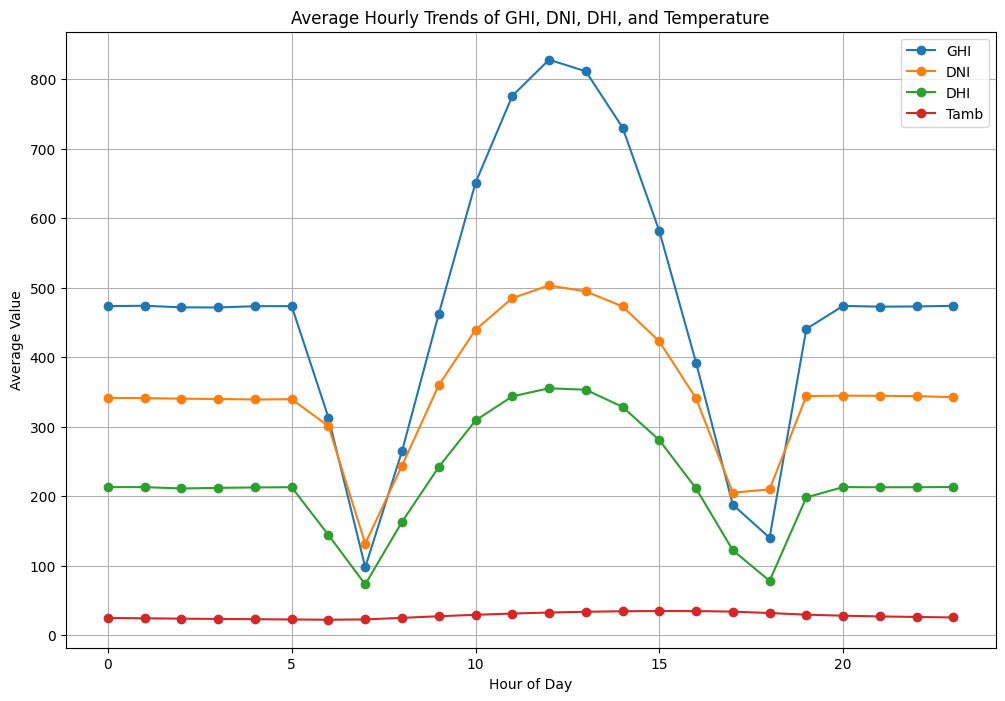

In [13]:
# Extract hour from timestamp index
df['Hour'] = df.index.hour

# Calculate average values by hour of day
hourly_avg = df.groupby('Hour').mean()

plt.figure(figsize=(12,8))
plt.plot(hourly_avg.index, hourly_avg['GHI'], label='GHI', marker='o')
plt.plot(hourly_avg.index, hourly_avg['DNI'], label='DNI', marker='o')
plt.plot(hourly_avg.index, hourly_avg['DHI'], label='DHI', marker='o')
plt.plot(hourly_avg.index, hourly_avg['Tamb'], label='Tamb', marker='o')

plt.title('Average Hourly Trends of GHI, DNI, DHI, and Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()


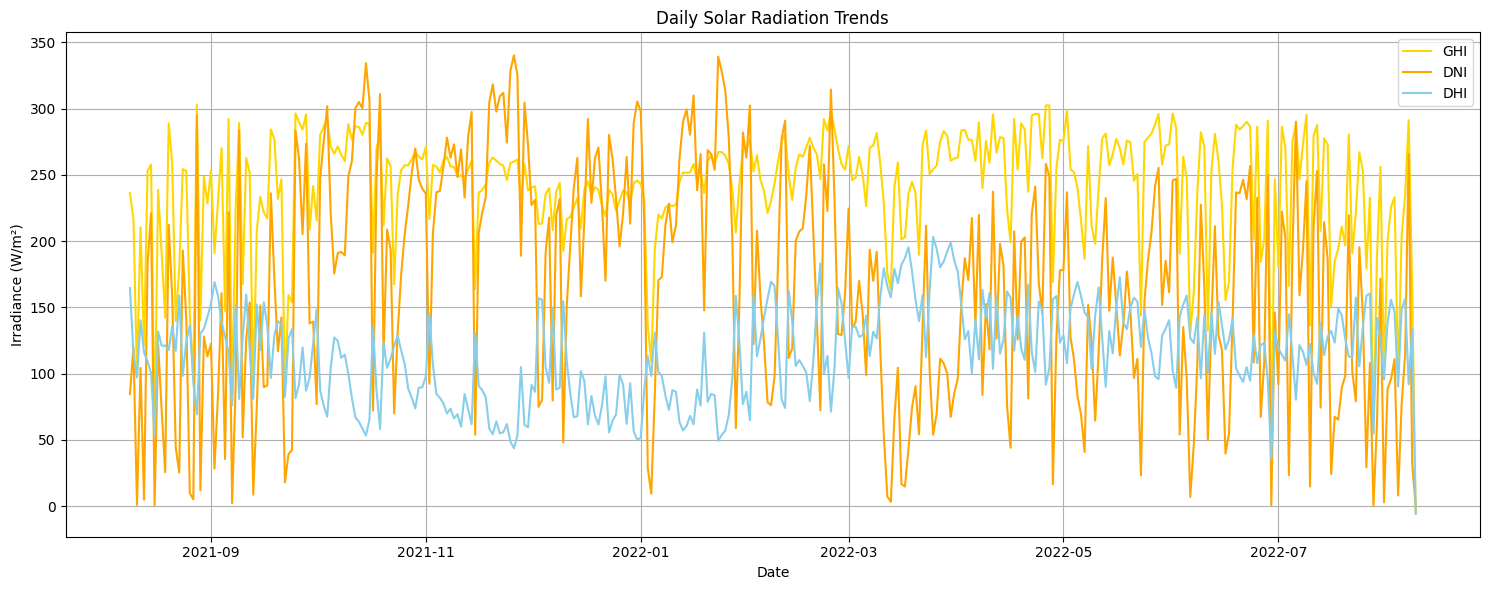

In [5]:
import matplotlib.pyplot as plt

# Daily mean for GHI, DNI, and DHI
# Resample the data to daily frequency and calculate the mean
daily_avg = df.resample('D').mean()

plt.figure(figsize=(15, 6))
plt.plot(daily_avg.index, daily_avg['GHI'], label='GHI', color='gold')
plt.plot(daily_avg.index, daily_avg['DNI'], label='DNI', color='orange')
plt.plot(daily_avg.index, daily_avg['DHI'], label='DHI', color='skyblue')

plt.title('Daily Solar Radiation Trends')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


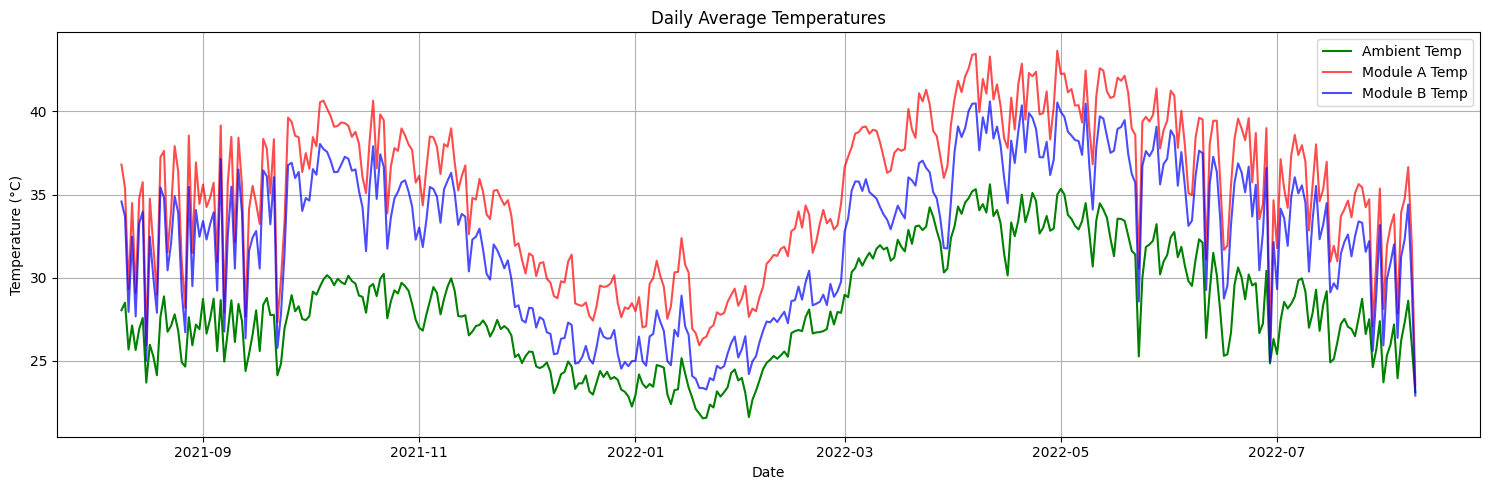

In [6]:
# Daily mean for ambient and module temperatures
plt.figure(figsize=(15, 5))
plt.plot(daily_avg.index, daily_avg['Tamb'], label='Ambient Temp', color='green')
plt.plot(daily_avg.index, daily_avg['TModA'], label='Module A Temp', color='red', alpha=0.7)
plt.plot(daily_avg.index, daily_avg['TModB'], label='Module B Temp', color='blue', alpha=0.7)

plt.title('Daily Average Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


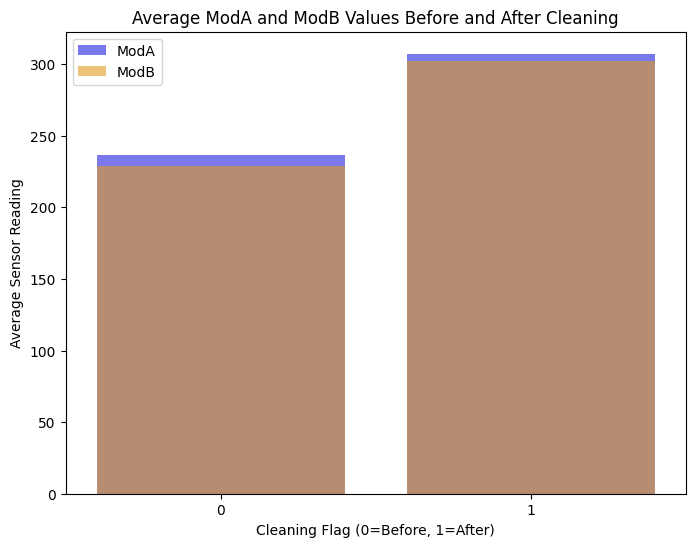

In [ ]:
import seaborn as sns

# Group by Cleaning flag and calculate mean of ModA and ModB
cleaning_group = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='Cleaning', y='ModA', data=cleaning_group, color='blue', alpha=0.6, label='ModA')
sns.barplot(x='Cleaning', y='ModB', data=cleaning_group, color='orange', alpha=0.6, label='ModB')

plt.title('Average ModA and ModB Values Before and After Cleaning')
plt.xlabel('Cleaning Flag (0=Before, 1=After)')
plt.ylabel('Average Sensor Reading')
plt.legend()
plt.show()


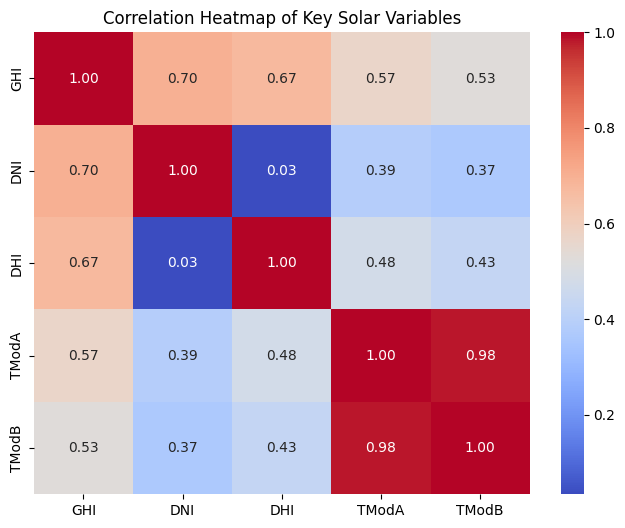

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = df[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Key Solar Variables')
plt.show()


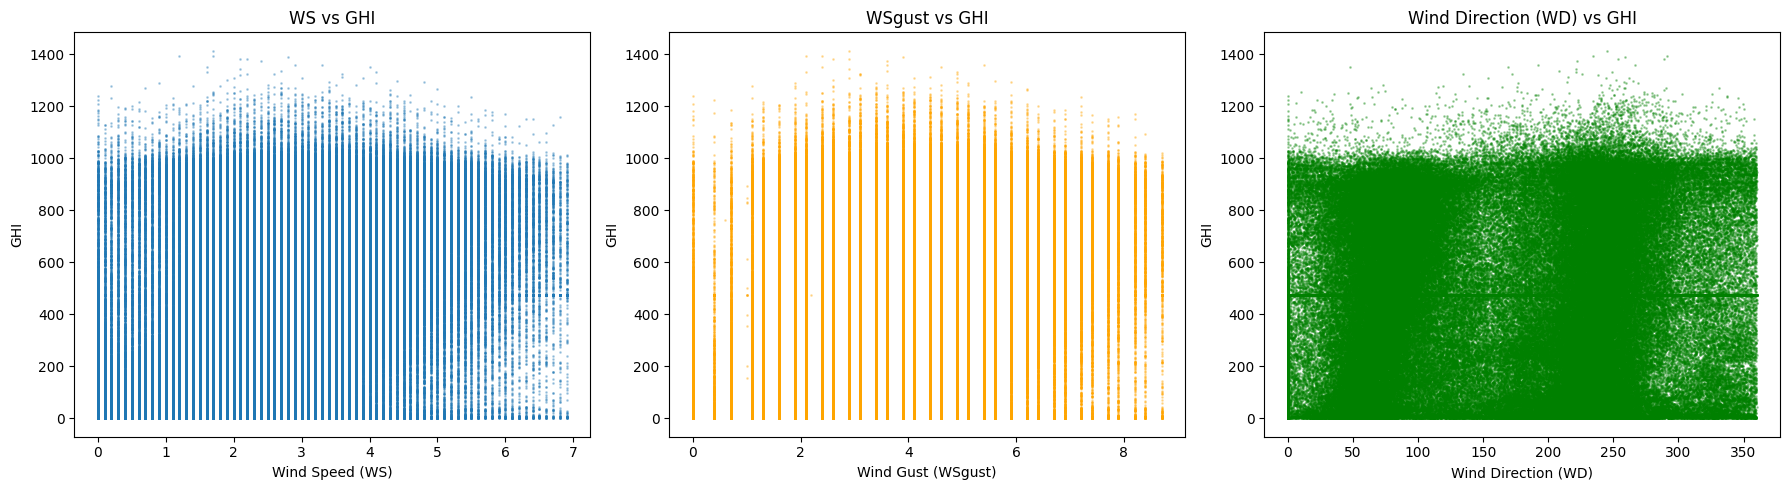

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
# Scatter plots of WS, WSgust, and WD against GHI
# WS vs GHI
axs[0].scatter(df['WS'], df['GHI'], alpha=0.3, s=1)
axs[0].set_title('WS vs GHI')
axs[0].set_xlabel('Wind Speed (WS)')
axs[0].set_ylabel('GHI')

# WSgust vs GHI
axs[1].scatter(df['WSgust'], df['GHI'], alpha=0.3, s=1, color='orange')
axs[1].set_title('WSgust vs GHI')
axs[1].set_xlabel('Wind Gust (WSgust)')
axs[1].set_ylabel('GHI')

# WD vs GHI
axs[2].scatter(df['WD'], df['GHI'], alpha=0.3, s=1, color='green')
axs[2].set_title('Wind Direction (WD) vs GHI')
axs[2].set_xlabel('Wind Direction (WD)')
axs[2].set_ylabel('GHI')

plt.tight_layout()
plt.show()


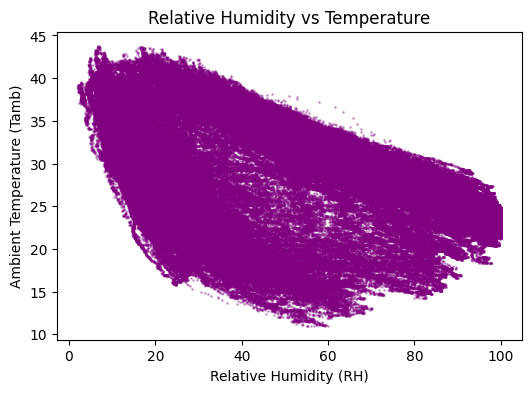

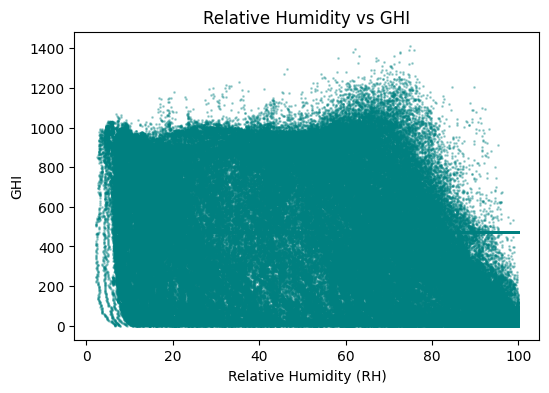

In [17]:
#scatter plots of RH, Tamb, and GHI against each other
# RH vs Tamb
plt.figure(figsize=(6, 4))
plt.scatter(df['RH'], df['Tamb'], alpha=0.3, s=1, color='purple')
plt.title('Relative Humidity vs Temperature')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.show()

# RH vs GHI
plt.figure(figsize=(6, 4))
plt.scatter(df['RH'], df['GHI'], alpha=0.3, s=1, color='teal')
plt.title('Relative Humidity vs GHI')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('GHI')
plt.show()


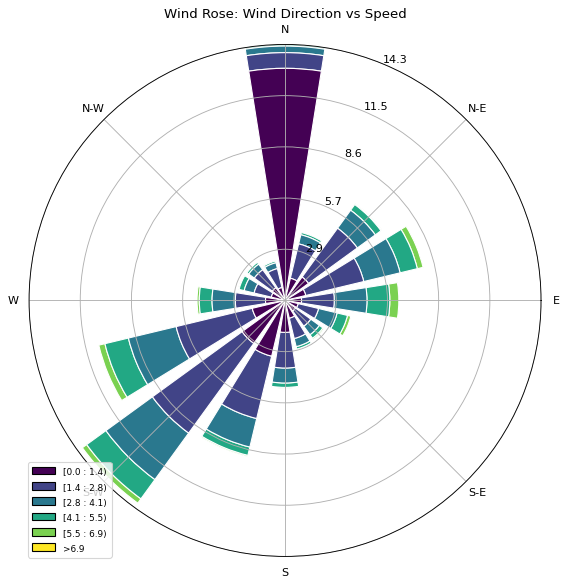

In [18]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Create Windrose
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose: Wind Direction vs Speed')
plt.show()


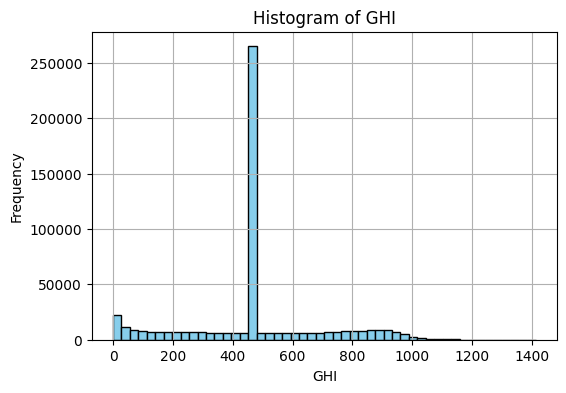

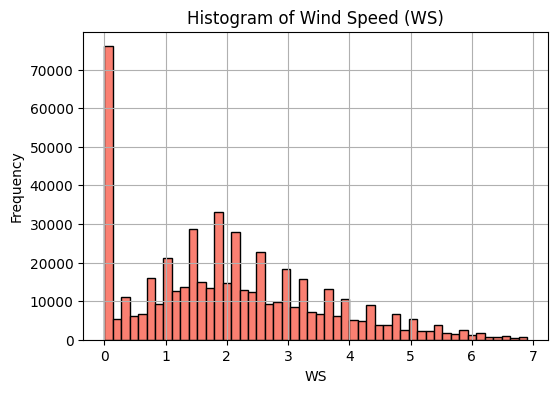

In [19]:
# Histogram for GHI
plt.figure(figsize=(6, 4))
plt.hist(df['GHI'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram for WS
plt.figure(figsize=(6, 4))
plt.hist(df['WS'], bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('WS')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


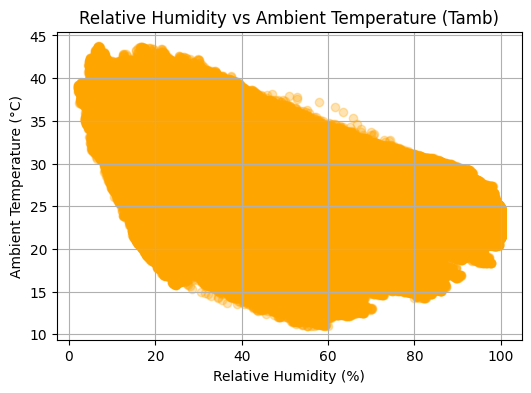

In [ ]:
#
plt.figure(figsize=(6, 4))
plt.scatter(df['RH'], df['Tamb'], alpha=0.3, color='orange')
plt.title('Relative Humidity vs Ambient Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True)
plt.show()


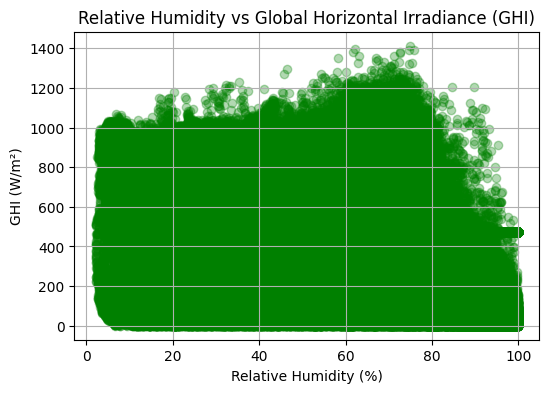

In [21]:
plt.figure(figsize=(6, 4))
plt.scatter(df['RH'], df['GHI'], alpha=0.3, color='green')
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()


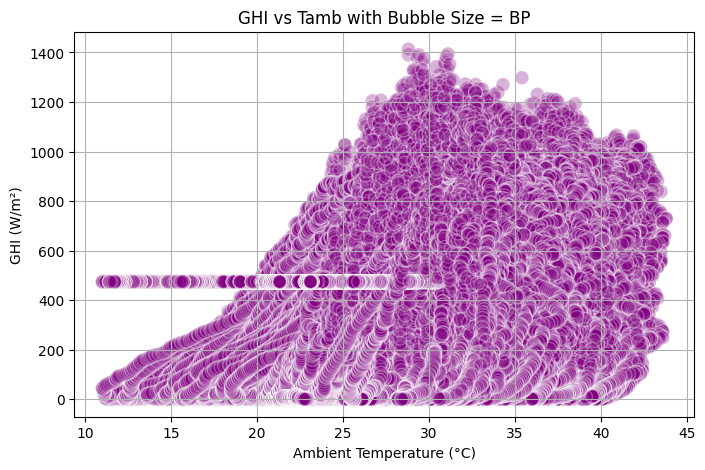

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Tamb'], df['GHI'], s=df['BP']/10, alpha=0.3, c='purple', edgecolors='w')
plt.title('GHI vs Tamb with Bubble Size = BP')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()
